In [58]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm

100%|██████████| 201/201 [00:00<00:00, 316.52it/s]


Maximum shock compression at i = 48


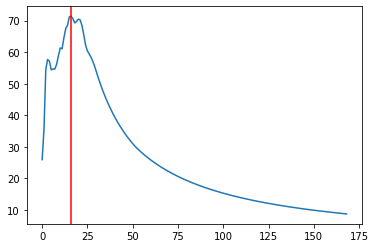

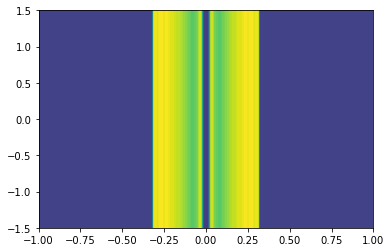

  0%|          | 0/20 [00:00<?, ?it/s]

shock_width: [1, 1]


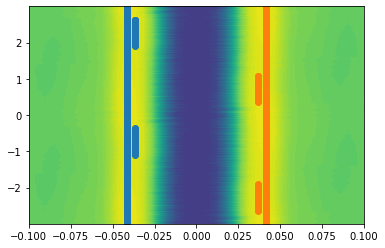

  5%|▌         | 1/20 [00:05<01:43,  5.44s/it]

shock_width: [0, 0]


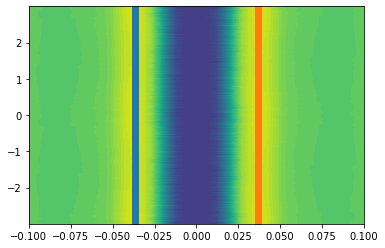

 10%|█         | 2/20 [00:09<01:26,  4.79s/it]

shock_width: [0, 0]


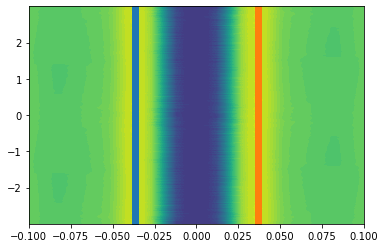

 15%|█▌        | 3/20 [00:14<01:18,  4.62s/it]

shock_width: [0, 0]


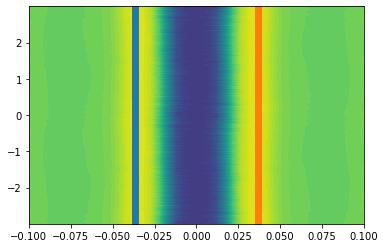

 20%|██        | 4/20 [00:18<01:12,  4.55s/it]

shock_width: [1, 1]


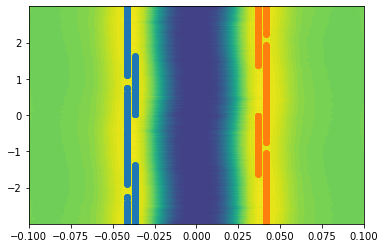

 25%|██▌       | 5/20 [00:23<01:12,  4.84s/it]

shock_width: [1, 1]


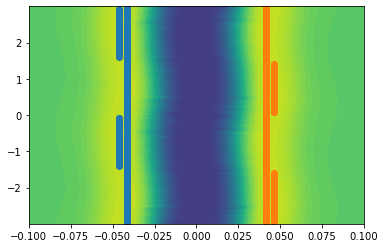

 30%|███       | 6/20 [00:29<01:09,  4.98s/it]

shock_width: [1, 1]


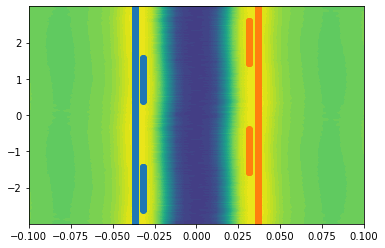

 35%|███▌      | 7/20 [00:33<01:02,  4.84s/it]

shock_width: [1, 1]


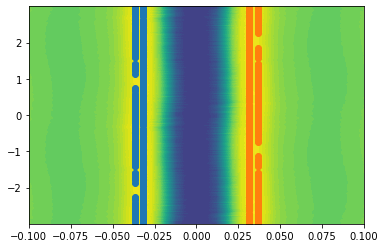

 40%|████      | 8/20 [00:38<00:57,  4.78s/it]

shock_width: [0, 0]


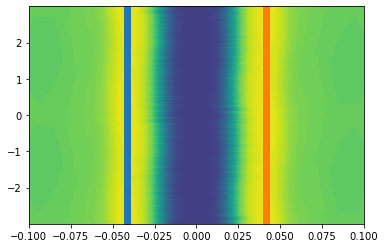

 45%|████▌     | 9/20 [00:44<00:55,  5.03s/it]

shock_width: [0, 0]


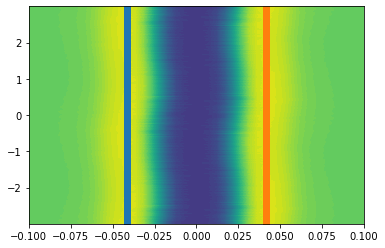

 50%|█████     | 10/20 [00:49<00:51,  5.17s/it]

shock_width: [0, 0]


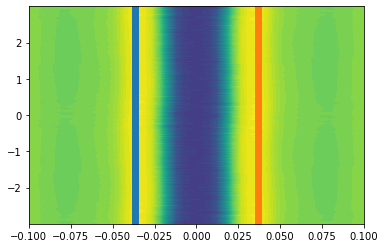

 55%|█████▌    | 11/20 [00:54<00:44,  4.98s/it]

shock_width: [1, 1]


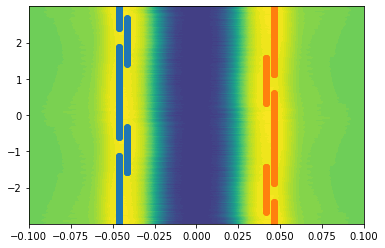

 60%|██████    | 12/20 [00:59<00:40,  5.07s/it]

shock_width: [0, 0]


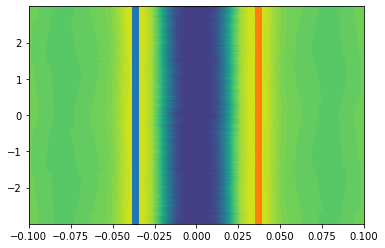

 65%|██████▌   | 13/20 [01:03<00:34,  4.93s/it]

shock_width: [1, 1]


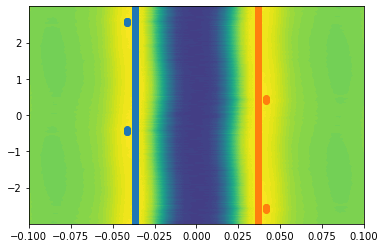

 70%|███████   | 14/20 [01:09<00:30,  5.15s/it]

shock_width: [1, 1]


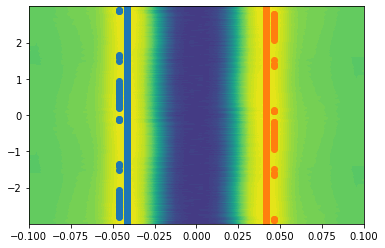

 75%|███████▌  | 15/20 [01:15<00:26,  5.26s/it]

shock_width: [1, 1]


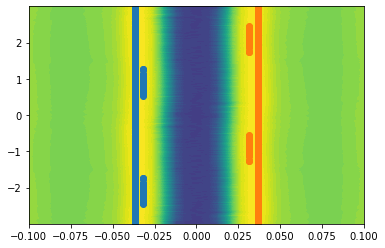

 80%|████████  | 16/20 [01:19<00:20,  5.05s/it]

shock_width: [1, 1]


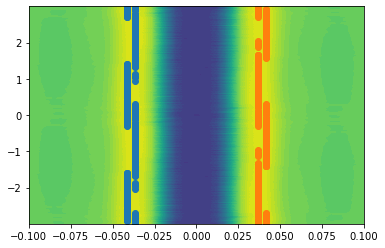

 85%|████████▌ | 17/20 [01:24<00:14,  4.88s/it]

shock_width: [1, 1]


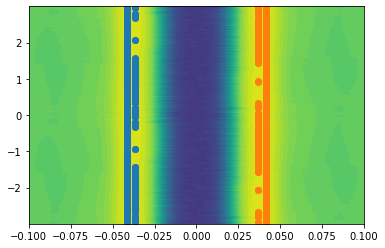

 90%|█████████ | 18/20 [01:28<00:09,  4.74s/it]

shock_width: [0, 0]


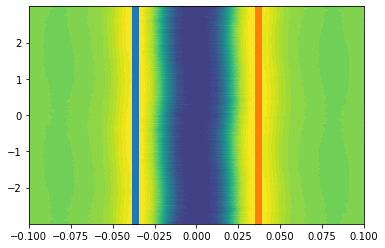

 95%|█████████▌| 19/20 [01:32<00:04,  4.63s/it]

shock_width: [1, 1]


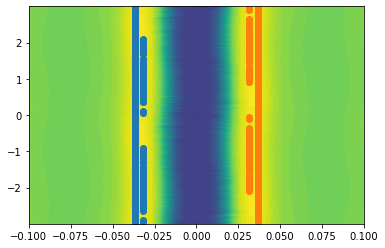

100%|██████████| 20/20 [01:37<00:00,  4.88s/it]


In [97]:
suite = 'corrT2_press'

# first, find the collision time using 1D data

rhomax = []
rho_prev = np.inf; i_start = 0
for i in tqdm(range(len(os.listdir(f'/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/{suite}/prod1_corr_ampl/results_corr0ampl1/joined_vtk')))):
    with open(f'/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/{suite}/prod1_corr_ampl/results_corr0ampl1/joined_vtk/IntSh2-p1.{i:04d}.vtk.pkl', 'rb') as f:
        data = pkl.load(f)[0]
        rho = np.max(data['rho'])
        if rho > rho_prev: # ignore the initial decompression
            rhomax.append(rho)
            rho_prev = -np.inf
            if not i_start: i_start = i
        else:
            rho_prev = rho
            continue
        del data
            
i_coll = np.argmax(rhomax)+i_start
print(f'Maximum shock compression at i = {i_coll}')

plt.plot(range(len(rhomax)), rhomax)
plt.axvline(i_coll-i_start, color='r')
plt.show(); plt.close()

with open(f'/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/{suite}/prod1_corr_ampl/results_corr0ampl1/joined_vtk/IntSh2-p1.{i_coll:04d}.vtk.pkl', 'rb') as f:
        data = pkl.load(f)[0]
        rho = np.max(data['rho'])
        plt.contourf(data['x1v'], data['x2v'], data['rho'], 64)
        plt.xlim(-1,1)
        plt.show(); plt.close()
        
# then, fine-tune on 2D data

rhomax = []
rho_prev = np.inf; i_start = 0
folder = f'/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/{suite}/prod1_corr_ampl/results_corr1ampl1/joined_vtk'
for filename in tqdm(os.listdir(folder)):
    with open(os.path.join(folder,filename), 'rb') as f:
        data = pkl.load(f)[0]
        # find the shock front by local maxima of density and calculate shock width
        margin = 32
        shock_pos = np.array([
            (
                data['x2v'][i],
                data['x1v'][(middle-margin)+np.argmax(line[(middle-margin):middle])],
                data['x1v'][middle+np.argmax(line[middle:(middle+margin)])]
            ) for i,line in enumerate(data['rho'])
        ]).T
        shock_idx = np.array([
            (
                (middle-margin)+np.argmax(line[(middle-margin):middle]),
                middle+np.argmax(line[middle:(middle+margin)])
            ) for line in data['rho']
        ]).T
        shock_width = [(np.max(l)-np.min(l)) for l in shock_idx]

        print(f'shock_width: {shock_width}')

        plt.contourf(data['x1v'], data['x2v'], data['rho'], 64)
        plt.scatter(shock_pos[1], shock_pos[0])
        plt.scatter(shock_pos[2], shock_pos[0])
        plt.xlim(-.1,.1)
        plt.show(); plt.close()

100%|██████████| 201/201 [00:00<00:00, 1114.78it/s]


Maximum shock compression at i = 48


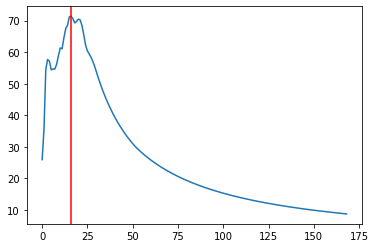

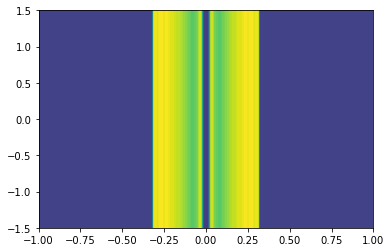

In [55]:
suite = 'corrT3_vel'

rhomax = []
rho_prev = np.inf; i_start = 0
for i in tqdm(range(len(os.listdir(f'/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/{suite}/prod1_corr_ampl/results_corr0ampl1/joined_vtk')))):
    with open(f'/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/{suite}/prod1_corr_ampl/results_corr0ampl1/joined_vtk/IntSh2-p1.{i:04d}.vtk.pkl', 'rb') as f:
        data = pkl.load(f)[0]
        rho = np.max(data['rho'])
        if rho > rho_prev: # ignore the initial decompression
            rhomax.append(rho)
            rho_prev = -np.inf
            if not i_start: i_start = i
        else:
            rho_prev = rho
            continue
        del data
            
i_coll = np.argmax(rhomax)+i_start
print(f'Maximum shock compression at i = {i_coll}')

plt.plot(range(len(rhomax)), rhomax)
plt.axvline(i_coll-i_start, color='r')
plt.show(); plt.close()

with open(f'/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/{suite}/prod1_corr_ampl/results_corr0ampl1/joined_vtk/IntSh2-p1.{i_coll:04d}.vtk.pkl', 'rb') as f:
        data = pkl.load(f)[0]
        rho = np.max(data['rho'])
        plt.contourf(data['x1v'], data['x2v'], data['rho'], 64)
        plt.xlim(-1,1)
        plt.show(); plt.close()